<a href="https://colab.research.google.com/github/sejeong-park/Energy_Consumption/blob/main/Stock_daily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
def MinMaxScaler(data):
  denom=np.max(data,0)-np.min(data,0)
  nume=data-np.min(data,0)
  return nume/denom

def back_MinMax(data,value):
  diff=np.max(data,0)-np.min(data,0)
  back=value*diff+np.min(data,0)
  return back

  
xy=pd.read_csv('data-02-stock_daily.csv',delimiter=",",skiprows=0+1+1)



In [ ]:
xy

,828.659973,833.450012,828.349976,1247700,831.659973
0,823.020020,828.070007,821.655029,1597800,828.070007
1,819.929993,824.400024,818.979980,1281700,824.159973
2,819.359985,823.000000,818.469971,1304000,818.979980
3,819.000000,823.000000,816.000000,1053600,820.450012
4,816.000000,820.958984,815.489990,1198100,819.239990
...,...,...,...,...,...
726,599.992707,604.832763,562.192568,147100,567.002574
727,558.712504,568.452595,558.712504,7900,567.162558
728,566.892592,567.002574,556.932537,10800,556.972503
729,561.202549,566.432590,558.672539,41200,559.992565


In [ ]:
xy=np.array(xy.iloc[::-1])


In [ ]:
xy

array([[5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       ...,
       [8.19359985e+02, 8.23000000e+02, 8.18469971e+02, 1.30400000e+06,
        8.18979980e+02],
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02]])

(731, 5)


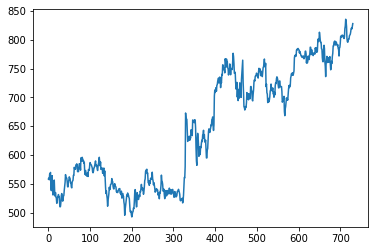

In [ ]:
plt.plot(xy[:,4])
print(xy.shape)

In [ ]:

seqLength = 7 # window size 
dataDim = 5 # 시가, 고가, 저가, 거래량 , 종가
hiddenDim = 10 
outputDim = 1
lr = 0.01
iterations = 500

trainSize = int(len(xy)*0.7)
trainSet = xy[0:trainSize]
testSet = xy[trainSize-seqLength:]

trainSet = MinMaxScaler(trainSet)
testSet = MinMaxScaler(testSet)


# 7일간의 5가지 데이터(시가, 종가, 고가, 저가, 거래량)를 받아와서 
# 바로 다음 날의 종가를 예측하는 모델로 구성

def buildDataSet(timeSeries, seqLength):
    xdata = []
    ydata = [] 
    for i in range(0, len(timeSeries)-seqLength):
        tx = timeSeries[i:i+seqLength,:-1]
        ty = timeSeries[i+seqLength,[-1]]
        xdata.append(tx)
        ydata.append(ty)
    return np.array(xdata), np.array(ydata)
    
trainX, trainY=buildDataSet(trainSet, seqLength)
testX, testY=buildDataSet(testSet, seqLength)

# **RNN 모델 구성**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential()
model.add(layers.SimpleRNN(units=10, activation='tanh',input_shape=[7,4]))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                150       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 학습과정 설정 
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 모델 트레이닝 
hist = model.fit(trainX, trainY, epochs=1000, batch_size=16)

Epoch 1/1000
32/32 [==============================] - 1s 2ms/step - loss: 0.3652 - mae: 0.4354
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0548 - mae: 0.1979
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0105 - mae: 0.0805
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0085 - mae: 0.0673
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0068 - mae: 0.0612
Epoch 6/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0055 - mae: 0.0543
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0043 - mae: 0.0458
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0045 - mae: 0.0469
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0033 - mae: 0.0422
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0038 - mae: 0.0415
Epoch 11/1000
32/32 [============================

In [ ]:
res=model.evaluate(testX,testY,batch_size=16)
print("loss",res[0],"mae",res[1])

14/14 [==============================] - 0s 1ms/step - loss: 0.0032 - mae: 0.0409
loss 0.0031800789292901754 mae 0.04093291610479355


In [ ]:
xhat=testX
yhat=model.predict(xhat)
print(testY)
print(yhat)

print("Evaluate: {}".format(np.average((yhat-testY)**2)))

[[0.43020149]
 [0.42345156]
 [0.40523252]
 [0.44698661]
 [0.49853637]
 [0.50737719]
 [0.54202261]
 [0.58747979]
 [0.51173763]
 [0.50421114]
 [0.54285897]
 [0.30171446]
 [0.3278778 ]
 [0.23821762]
 [0.22447896]
 [0.13595373]
 [0.14784065]
 [0.1789022 ]
 [0.14395782]
 [0.163909  ]
 [0.19813624]
 [0.25601811]
 [0.26665086]
 [0.32805682]
 [0.28092692]
 [0.26909979]
 [0.25428597]
 [0.28809502]
 [0.22680829]
 [0.22919779]
 [0.1915059 ]
 [0.24777484]
 [0.21492137]
 [0.30959934]
 [0.3405413 ]
 [0.33367179]
 [0.38468415]
 [0.40296262]
 [0.39358476]
 [0.37118466]
 [0.3230394 ]
 [0.28845341]
 [0.28905096]
 [0.35852117]
 [0.3603131 ]
 [0.30553713]
 [0.29926518]
 [0.29872778]
 [0.30261025]
 [0.2514783 ]
 [0.14013479]
 [0.15202208]
 [0.16534255]
 [0.17442218]
 [0.20076453]
 [0.04157435]
 [0.        ]
 [0.07036599]
 [0.0946776 ]
 [0.14240469]
 [0.18487556]
 [0.15942898]
 [0.17627391]
 [0.1618779 ]
 [0.22322443]
 [0.27973254]
 [0.31288462]
 [0.29102191]
 [0.31473634]
 [0.30816543]
 [0.39137465]
 [0.41

In [ ]:
predict1=back_MinMax(xy[trainSize-seqLength:,[-1]],yhat)
actual=back_MinMax(xy[trainSize-seqLength:,[-1]],testY)

print("예측값", predict1)
print("실제값", actual)

예측값 [[742.35887908]
 [740.30862974]
 [732.82770452]
 [735.05687676]
 [738.31313693]
 [756.60386044]
 [760.31243704]
 [761.05497058]
 [767.68885835]
 [757.70533743]
 [758.36209655]
 [766.92403302]
 [727.18486765]
 [736.24190798]
 [715.06417544]
 [687.71077753]
 [695.38615082]
 [702.77298211]
 [694.57652742]
 [693.73678917]
 [693.72375736]
 [700.18055825]
 [707.66094214]
 [716.87561145]
 [726.47941388]
 [718.30267902]
 [714.58526655]
 [716.76817887]
 [716.04369128]
 [713.92907121]
 [704.21003309]
 [697.46956341]
 [715.96798008]
 [710.63433927]
 [719.74183046]
 [724.30085214]
 [727.82232353]
 [735.02477122]
 [744.72794866]
 [735.69591422]
 [729.20351536]
 [723.16090837]
 [717.94470848]
 [718.33915012]
 [726.12351386]
 [728.10179889]
 [721.87656701]
 [722.32087576]
 [717.4488313 ]
 [720.42832524]
 [705.06664732]
 [688.09890783]
 [698.10152618]
 [705.20721571]
 [689.19653439]
 [696.30259562]
 [680.03664407]
 [647.15840775]
 [691.83998785]
 [679.77213258]
 [683.16448332]
 [692.90187049]
 [69

In [ ]:
print(predict1.shape)
print(actual.shape)

(220, 1)
(220, 1)


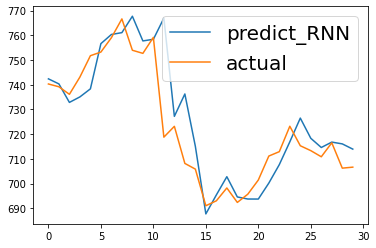

In [ ]:
plt.figure()
plt.plot(predict1[:30],label="predict_RNN")
plt.plot(actual[:30],label="actual")

plt.legend(prop={'size':20})

# **LSTM 모델 구성**

In [ ]:
model2=keras.Sequential()
model2.add(layers.LSTM(units=10,activation='tanh',input_shape=[7,4]))
model2.add(layers.Dense(1))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#모델 학습 과정 설정
model2.compile(loss='mse',optimizer='adam',metrics=['mae'])
#모델 트레이닝
hist=model2.fit(trainX,trainY,epochs=100,batch_size=16)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.1308 - mae: 0.2841
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0079 - mae: 0.0741
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0048 - mae: 0.0549
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0045 - mae: 0.0455
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0031 - mae: 0.0396
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0043 - mae: 0.0434
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0029 - mae: 0.0377
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0043 - mae: 0.0419
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0030 - mae: 0.0393
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0056 - mae: 0.0442
Epoch 11/100
32/32 [==============================] - 0s 4m

In [ ]:
res2=model2.evaluate(testX,testY,batch_size=16)
print("loss",res2[0],"mae",res2[1])


14/14 [==============================] - 0s 2ms/step - loss: 0.0036 - mae: 0.0473
loss 0.0036359210498631 mae 0.04733720421791077


In [ ]:
xhat=testX
yhat=model2.predict(xhat)
print(testY)
print(yhat)

print("Evaluate: {}".format(np.average((yhat-testY)**2)))

[[0.43020149]
 [0.42345156]
 [0.40523252]
 [0.44698661]
 [0.49853637]
 [0.50737719]
 [0.54202261]
 [0.58747979]
 [0.51173763]
 [0.50421114]
 [0.54285897]
 [0.30171446]
 [0.3278778 ]
 [0.23821762]
 [0.22447896]
 [0.13595373]
 [0.14784065]
 [0.1789022 ]
 [0.14395782]
 [0.163909  ]
 [0.19813624]
 [0.25601811]
 [0.26665086]
 [0.32805682]
 [0.28092692]
 [0.26909979]
 [0.25428597]
 [0.28809502]
 [0.22680829]
 [0.22919779]
 [0.1915059 ]
 [0.24777484]
 [0.21492137]
 [0.30959934]
 [0.3405413 ]
 [0.33367179]
 [0.38468415]
 [0.40296262]
 [0.39358476]
 [0.37118466]
 [0.3230394 ]
 [0.28845341]
 [0.28905096]
 [0.35852117]
 [0.3603131 ]
 [0.30553713]
 [0.29926518]
 [0.29872778]
 [0.30261025]
 [0.2514783 ]
 [0.14013479]
 [0.15202208]
 [0.16534255]
 [0.17442218]
 [0.20076453]
 [0.04157435]
 [0.        ]
 [0.07036599]
 [0.0946776 ]
 [0.14240469]
 [0.18487556]
 [0.15942898]
 [0.17627391]
 [0.1618779 ]
 [0.22322443]
 [0.27973254]
 [0.31288462]
 [0.29102191]
 [0.31473634]
 [0.30816543]
 [0.39137465]
 [0.41

In [ ]:
predict2=back_MinMax(xy[trainSize-seqLength:,[-1]],yhat)
actual=back_MinMax(xy[trainSize-seqLength:,[-1]],testY)


In [ ]:
print("예측값",predict2)
print("실제값",actual)

예측값 [[743.2744782 ]
 [745.87381461]
 [745.45797926]
 [745.47838511]
 [742.32154485]
 [751.92137587]
 [758.3445545 ]
 [760.76740273]
 [766.55669774]
 [766.62843255]
 [761.11577903]
 [760.1225279 ]
 [733.9271958 ]
 [726.15608838]
 [720.63517274]
 [706.1993742 ]
 [703.75657413]
 [694.26258912]
 [695.29147315]
 [695.63190913]
 [693.73309466]
 [697.94081387]
 [702.54391768]
 [711.87960517]
 [718.40559636]
 [720.97858976]
 [717.50569328]
 [715.24799774]
 [713.40174207]
 [715.1560367 ]
 [709.19862291]
 [705.41089755]
 [707.48592079]
 [708.65696477]
 [712.45224129]
 [721.95863945]
 [725.01420881]
 [729.33063534]
 [736.25915567]
 [736.97058152]
 [733.05661428]
 [729.40108791]
 [724.54182081]
 [722.33932585]
 [726.23142539]
 [727.49585982]
 [724.08578742]
 [722.8394688 ]
 [720.64923232]
 [722.25598615]
 [715.79035437]
 [707.60846816]
 [702.91156978]
 [700.1172078 ]
 [698.40790084]
 [696.5738338 ]
 [687.53507267]
 [678.12632948]
 [680.73399038]
 [684.34152931]
 [686.48561813]
 [691.96575825]
 [69

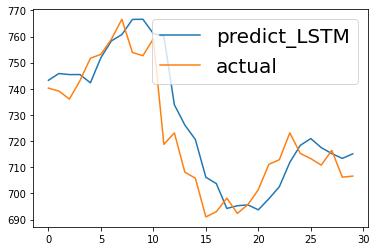

In [ ]:
plt.figure()
plt.plot(predict2[:30],label="predict_LSTM")
plt.plot(actual[:30],label="actual")

plt.legend(prop={'size':20})

LSTM과 RNN 모델 비교

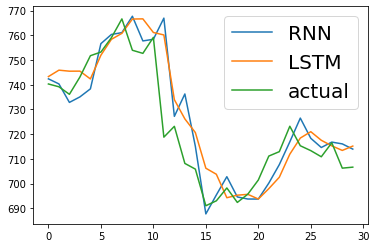

In [ ]:
plt.figure()
day=30
plt.plot(predict1[:day],label="RNN")
plt.plot(predict2[:day],label="LSTM")
plt.plot(actual[:day],label="actual")

plt.legend(prop={'size':20})